# 朴素贝叶斯算法说明

## 朴素贝叶斯算法的概要说明
- 朴素贝叶斯是一种分类算法；
- 属于监督学习；
- 使用贝叶斯定理作为数学理论基础。
- 大量样本下会有较好的分类效果，不适用于数据特征有关联的训练样本。

## 应用场景

1. 文本分类
2. 垃圾邮件过滤
3. 病人分类
4. 拼写检查

## 贝叶斯算法的优缺点

1. 朴素贝叶斯的主要优点有：
    - 朴素贝叶斯模型发源于古典数学理论，有稳定的分类效率。
    - 对小规模的数据表现很好，能个处理多分类任务，适合增量式训练，尤其是数据量超出内存时，我们可以一批批的去增量训练。
    - 对缺失数据不太敏感，算法也比较简单，常用于文本分类。

2. 朴素贝叶斯的主要缺点有：　　　
    - 理论上，朴素贝叶斯模型与其他分类方法相比具有最小的误差率。但是实际上并非总是如此，这是因为朴素贝叶斯模型给定输出类别的情况下,假设属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。而在属性相关性较小时，朴素贝叶斯性能最为良好。对于这一点，有半朴素贝叶斯之类的算法通过考虑部分关联性适度改进。
    - 需要知道先验概率，且先验概率很多时候取决于假设，假设的模型可以有很多种，因此在某些时候会由于假设的先验模型的原因导致预测效果不佳。
    - 由于我们是通过先验和数据来决定后验的概率从而决定分类，所以分类决策存在一定的错误率。
    - 对输入数据的表达形式很敏感。

# 朴素贝叶斯算法的分类思想

- 使用病人分类作为例子：
    - 已知病例：


症状　　|职业　　　|疾病 
-|-|-
打喷嚏　|护士　　　|感冒 
打喷嚏　|农夫　　　|过敏 
头痛　　|建筑工人　|脑震荡 
头痛　　|建筑工人　|感冒 
打喷嚏　|教师　　　|感冒 
头痛　　|教师　　　|脑震荡

- 假设需要对一个新的病人的病情做判定，该病人信息如下：
    - 打喷嚏
    - 建筑工人
    
    - 请判定病人最可能是什么病：感冒？过敏？脑震荡？ 

- 诊断过程：
    1. 计算三种病状的可能性：
        - 计算感冒的可能性
        - 计算过敏的可能性
        - 计算脑震荡的可能性
    2. 可能性最大的病状就是最终诊断
    
    

- 如果使用概率表示可能性，则某个病状的概率计算为：
    - P(感冒|打喷嚏x建筑工人) = P(打喷嚏x建筑工人|感冒) x P(感冒) / P(打喷嚏x建筑工人)
        - P(打喷嚏x建筑工人|感冒) =  P(打喷嚏|感冒) x P(建筑工人|感冒)  = $\dfrac{2}{3} \times \dfrac{1}{3}$
        - P(感冒)  = $\dfrac{3}{6}$
        - P(打喷嚏x建筑工人) = P(打喷嚏) x P(建筑工人) = $\dfrac{3}{6}  \times \dfrac{2}{6}$

        - P(感冒|打喷嚏x建筑工人)  = $\dfrac{\dfrac{2}{3} \times \dfrac{1}{3} \times \dfrac{3}{6}} {\dfrac{3}{6}  \times \dfrac{2}{6}} = \dfrac{\dfrac{6}{54}}{\dfrac{6}{36}} = \dfrac{36}{54} = \dfrac{2}{3} = 0.6666\cdots$
        
    - 脑震荡的概率：
        - P(脑震荡|打喷嚏x建筑工人) = P(打喷嚏x建筑工人|脑震荡) x P(脑震荡) / P(打喷嚏x建筑工人)
        - P(打喷嚏x建筑工人|脑震荡) = P(打喷嚏|脑震荡) x P(建筑工人|脑震荡)  = 0
    - 过敏的概率
        - P(过敏|打喷嚏x建筑工人) = P(打喷嚏x建筑工人|过敏) x P(过敏) / P(打喷嚏x建筑工人)
        - P(打喷嚏x建筑工人|过敏) = P(打喷嚏|过敏) x P(建筑工人|过敏) = 0

- 结论：
    - 打喷嚏的建筑工人有66.6666%的概率是感冒，0%的概率是过敏与脑震荡。

# sklearn的贝叶斯应用体验

- sklearn的贝叶斯实现是四个类：
    - 伯努利贝叶斯
    - 高斯贝叶斯
    - 多项式贝叶斯
        - The Complement Naive Bayes（补充贝叶斯）
    - 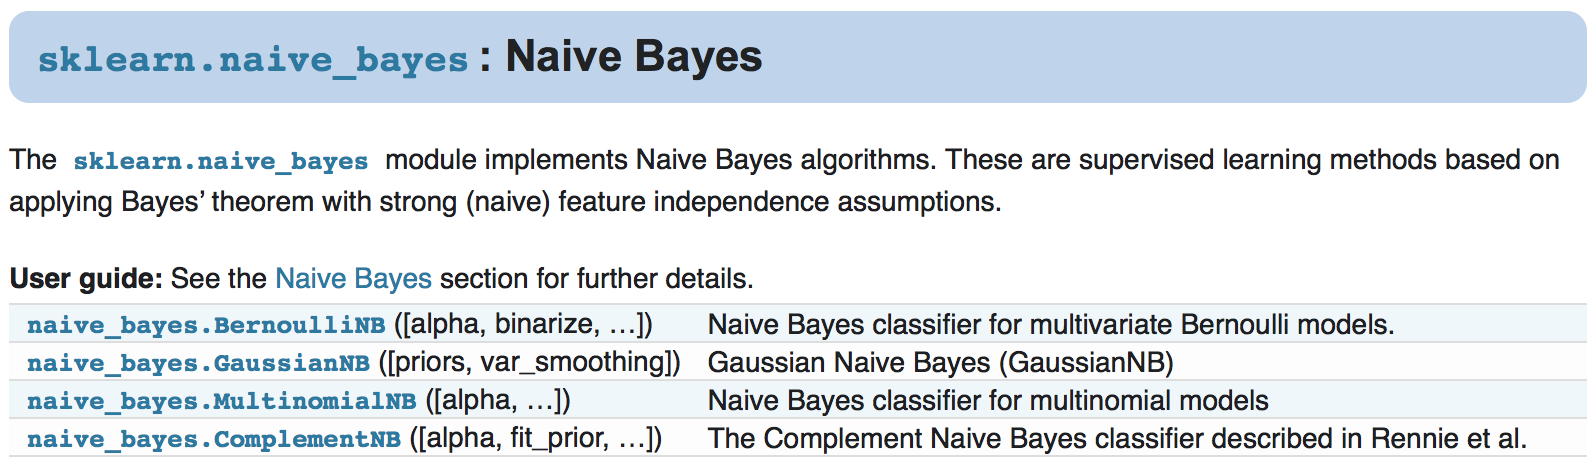

In [43]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
import sklearn.datasets as ds
data,target = ds.load_iris(return_X_y=True)
# 切分数据集
data_train, data_test, target_train, target_test = train_test_split(
    data,    # 数据集
    target,    # 数据集标签
    test_size=0.2)  

print('--------GaussianNB')
classifier1 = GaussianNB()
classifier1.fit(data_train, target_train)
pre = classifier1.predict(data_test)
print((pre == target_test).sum())
print('--------BernoulliNB')
classifier2= BernoulliNB()
classifier2.fit(data_train, target_train)
pre = classifier2.predict(data_test)
print((pre == target_test).sum())
print('--------MultinomialNB')
classifier3 = MultinomialNB()
classifier3.fit(data_train, target_train)
pre = classifier3.predict(data_test)
print((pre == target_test).sum())
print('--------ComplementNB')
classifier4 = ComplementNB()
classifier4.fit(data_train, target_train)
pre = classifier4.predict(data_test)
print((pre == target_test).sum())

--------GaussianNB
29
--------BernoulliNB
7
--------MultinomialNB
25
--------ComplementNB
20


# 朴素贝叶斯算法的数学基础

## 条件概率

- 理解条件贝叶斯公式从条件概率开始：
    - 假设有两个事件$X$， $Y$，事件$X, Y$同时发生的概率（联合概率）可以表示如下：
        - $P(X, Y)$
        
    - 事件$X，Y$同时发生，还可以表示为$Y$已经发生，然后$X$再发生的概率：
        - $Y$发生的概率（先验概率，也称边缘概率）表示为：$P(Y)$
        - 在$Y$已经发生的条件，$X$发生的概率就是条件概率，表示为：$P(X | Y)$

- 两个事件同时发生的概率（联合概率）表示为：
    - --
    - $P(X, Y) = P(X | Y) P(Y) = P(Y | X) P(X)$
    - --
- 从上式可以推导出条件概率表示：：
    - --
    - $P(X | Y) = \dfrac{P(X,Y)}{P(Y)} $
    - --
    - $P(Y | X) = \dfrac{P(X,Y)}{P(X)} $

- 从条件概率可以进一步推导：
    - --
    - $P(X | Y) = \dfrac{P(X,Y)}{P(Y)} = \dfrac{P(Y | X) P(X)}{P(Y)}$
    - --
    - $P(Y | X) = \dfrac{P(X,Y)}{P(X)} = \dfrac{P(X | Y) P(Y)}{P(X)}$

- 如果$A, B$是两个独立的特征，则其概率计算为：
    - $P(X,Y) =P(X)P(Y)$

- 则条件概率满足：
    - $P(Y | X) = P(Y)$
    - $P(X | Y) = P(X)$

## 全概率：

- 全概率是对一复杂事件X的概率求解问题转化为了在不同情况下发生的简单事件的概率的求和问题。

    

- 全概率公式：
    - 假设$\{Y_1,Y_2,Y_n\}$是一个完备事件组：
        - $Y_1 \cup Y_2 \cup \cdots \cup Y_n = \Omega $构成整个样本空间。
        - $Y_i \cap Y_j = \emptyset, \quad i \neq j$
    - 则对于任意一个事件$X$的概率使用全概率公式表示：
        - $P(X) = \sum \limits _{i=1}^n P(X,Y_i)= \sum \limits _{i=1} ^ nP(X|Y_i) P(Y_i)$

## 贝叶斯定理（公式）

- 条件概率：
    - $P(Y|X)=\dfrac{P(X，Y)}{P(X)}$
- 后验概率（贝叶斯公式）：
    - $P(X | Y ) = \dfrac{P( Y | X) P(X)} {P(Y)}$

- 全概率下的贝叶斯公式
    - $P(Y_k | X) = \dfrac{P(X|Y_k) P(Y_k)}{P(X)} = \dfrac{P(X|Y_k) P(Y_k)}{ \sum  \limits _{i=1} ^n P(X|Y_i) P(Y_i)}$

## 后验概率

- 后验概率在表现形式上与条件概率一样，但在理解上存在一些因果的区别：
    - 如果我们出门之前我们听到新闻说今天路上出了个交通事故，那么我们想算一下堵车的概率，这个就叫做条件概率 。也就是**P(堵车|交通事故)**。这是有因求果。
    - 如果我们已经出了门，然后遇到了堵车，那么我们想算一下堵车时由交通事故引起的概率有多大，那这个就叫做后验概率 （其实也是条件概率，但是通常习惯这么说） 。也就是**P(交通事故|堵车)**。这是有果求因。

- 后验概率的概念理解：
    - 后验概率：$P(Y | X) = \dfrac{P(X | Y) P(Y)}{P(X)}$
        - 归一化因子：$P(X)$
        - 先验概率：$P(X)$
        - 似然概率：$P(X | Y)$
        - 标准似然概率： $\dfrac{P(X | Y) }{P(X)}$
    - 后验概率：标准似然概率 * 先验概率
    
    - 贝叶斯公式就是用先验概率求后验概率。

## 多特征的情况

- 假设 $P(X)=1$，则贝叶斯公式为：
    - $P(Y_k | X) = \dfrac{P(X|Y_k) P(Y_k)}{P(X)} = P(X|Y_k) P(Y_k)$

- 假设$X=(X_1,X_2,\cdots, X_m)$
    - $P(Y_k | (X_1, X_2,\cdots, X_m)) =P(X_1,X_2,\cdots, X_m |Y_k) P(Y_k) = P(Y_k) \prod \limits _{i=1}^{m} P(X_i|Y_k)$

# 朴素贝叶斯算法的推导

- 条件假设：
    - 存在训练集$X= (X_1, X_2, \cdots , X_m)$，其分类标签是$(C_1, C_2, \cdots,C_m)$
        - $X_i = (x_{i1}, x_{i1}, \cdots, x_{in})$ ，一共$n$个样本。
    - 分类样本为$S=(s_1, s_2, \cdots, s_m)$：
        - 贝叶斯算法是找出在已知训练集的情况，找出概率最大的那个类别。

1.  求解问题表述：
    - $\begin{align} C_{result}  & = \underbrace{argmax}_{C_k}P(C=C_k|X=(X_1, X_2,\cdots, X_m)) \\& = \dfrac{\underbrace{argmax}_{C_k}P(X=(X_1,X_2,\cdots,X_m)|C=C_k)P(C=C_k)}{P(X=(X_1,X_2,\cdots, X_m))} \end{align}$

2. 假设$X=(X_1,X_2,\cdots, X_m)$是完备特征集：
    - $P(X=(X_1,X_2,\cdots, X_m)) = \prod \limits _{i=1}^m P(X=X_i)$
    - $C_{result}  = \underbrace{argmax}_{C_k} \dfrac{P(X=(X_1,X_2,\cdots,X_m)）|C=C_k) P(C=C_k)}{\prod \limits _{i=1}^m P(X=X_i)}$
    
    - $C_{result}  = \underbrace{argmax}_{C_k} \dfrac{P(C=C_k) \prod \limits_{i=1} ^m P(X=X_i |C=C_k) }{\prod \limits _{i=1}^m P(X=X_i)}$

3. 上述概率在离散情况下，使用频次与频率表示。

# 贝叶斯算法中的概率计算问题

## 离散值的情况

- $X_i$采用多项式分布：
    - $P(X=X_j | Y=C_k) = \dfrac{m_{kj}}{m_k}$
        - $m_k$表示类别C_k出现的次数
        - $m_kj$表示在类别$C_k$中，$X_j$出现的次数。

- 离散值的问题：
    - 某些时候，可能某些类别在样本中没有出现，这样可能导致$P(X=X_j | Y=C_k) = 0 $

- 离散值问题解决：
    - 引入拉普拉斯平滑，概率计算公式为：$P(X_j=X_j|Y=C_k) = \dfrac{m_{kj} + \lambda}{m_k + O_j\lambda}$
        - 其中$\lambda$为一个大于0的常数，通常取为1。
        - 其中$O_j$为第$j$个特征的取值个数（实际上，这个取值在不同场合中可以根据需要确定，因为主要用来做平滑，防止概率为0，所以取得值是多少，与最终结果关系不大）。

## 稀疏离散值

- 如果我们我们的$X_j$是非常稀疏的离散值，即各个特征出现概率很低，这时我们可以假设$X_j$符合伯努利分布:
    - 即特征$X_j$出现记为1，不出现记为0。即只要$X_j$出现即可，我们不关注$X_j$的次数。
    - $P(X=X_j|Y=C_k) = P(X_j|Y=C_k)X_j + (1 - P(X_j|Y=C_k))(1-X_j)$
        - 等式前的$X_j$还是表示特征值。
        - 等式后的$X_j$表示取值为0或者1（就是出现或者不出现）

## 连续值

- 如果我们我们的$X_j$是连续值，我们通常取$X_j$的先验概率为正态分布，即在样本类别$C_k$的值符合正态分布。这样$P(X = X_j | Y = C_k)$的概率分布是：
    - $P(X=X_j | Y=C_k) = \dfrac{1}{\sqrt{2\pi\sigma_k^2}}e^{-\dfrac{(X_j - \mu_k)^2}{2\sigma_k^2}}$
        - 其中$\mu _k$为在样本类别$C_k$中，所有$X_j$的平均值。$\sigma _k ^2$为在样本类别$C_k$中，所有$X_j$的方差。

## 各种算法的测试效果

- 对鸢尾花这种连续数据，使用高斯贝叶斯算法无疑是合适的。
    - 下面看看离散的情况
        - 手工计算：
            - `['打喷嚏','建筑工人']` : $\dfrac{2}{3}$
            - `['头痛', '护士']`：$\dfrac{2}{3}$


### 离散的测试效果

In [62]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.preprocessing import LabelEncoder
# 数据
data = np.array([
    ['打喷嚏','护士','感冒'],
    ['打喷嚏','农夫','过敏'],
    ['头痛','建筑工人','脑震荡'],
    ['头痛','建筑工人','感冒',],
    ['打喷嚏','教师','感冒',],
    ['头痛','教师','脑震荡']
])


# 训练集
data_train = np.zeros(shape=(data.shape[0], data.shape[1]-1),dtype=np.int32)

encoder = LabelEncoder()
encoder.fit(data[:,0])
# print(encoder.classes_)
# print(encoder.transform(data[:,0]))
data_train[:,0] = encoder.transform(data[:,0])

encoder.fit(data[:,1])
# print(encoder.classes_)
data_train[:,1] = encoder.transform(data[:,1])

encoder.fit(target)
# print(encoder.classes_)
target_train = encoder.transform(data[:,2])



# 测试集
test = np.array([
    ['打喷嚏','建筑工人'],
    ['头痛', '护士']
])
data_test = np.zeros(test.shape,dtype=np.int32)
encoder.fit(test[:,0])
data_test[:,0] = encoder.transform(test[:,0])

encoder.fit(test[:,1])
# print(encoder.classes_)
data_test[:,1] = encoder.transform(test[:,1])

print('--------GaussianNB')
classifier1 = GaussianNB()
classifier1.fit(data_train, target_train)
pre = classifier1.predict(data_test)
print(pre)
print('--------BernoulliNB')
classifier2= BernoulliNB()
classifier2.fit(data_train, target_train)
pre = classifier2.predict(data_test)
print(pre)
print('--------MultinomialNB')
classifier3 = MultinomialNB()
classifier3.fit(data_train, target_train)
pre = classifier3.predict(data_test)
print(pre)
print('--------ComplementNB')
classifier4 = ComplementNB()
classifier4.fit(data_train, target_train)
pre = classifier4.predict(data_test)
print(pre)



--------GaussianNB
[2 1]
--------BernoulliNB
[2 1]
--------MultinomialNB
[0 0]
--------ComplementNB
[2 1]


### 连续的测试效果

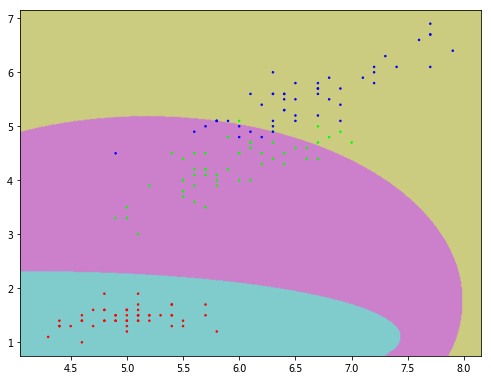

In [74]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
import sklearn.datasets as ds


data,target = ds.load_iris(return_X_y=True)
# 切分数据集
data_train, data_test, target_train, target_test = train_test_split(
    data,    # 数据集
    target,    # 数据集标签
    test_size=0.2)  

classifier = GaussianNB()
classifier.fit(data_train[:,[0, 2]], target_train)

# 可视化
figure = plt.figure('贝叶斯分类', figsize=(8, 6))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 2].min(), data[:, 2].max()
x_min -= 0.25
x_max += 0.25

y_min -= 0.25
y_max += 0.25
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

x, y = np.mgrid[x_min: x_max:500j, y_min: y_max:500j]  # 生成网格

x_y_plane = np.c_[x.flat, y.flat]   #  按照列合并

pre = classifier.predict(x_y_plane)

colors = ListedColormap([(0.5, 0.8, 0.8, 1),(0.8, 0.5, 0.8, 1),(0.8, 0.8, 0.5, 1)])
colors_pure = ListedColormap([(1, 0, 0, 1),(0, 1, 0, 1),(0, 0, 1, 1)])
ax.scatter (x.flat, y.flat, c=pre, cmap=colors, s=2**2, marker='.')
ax.scatter (data[:, 0], data[:, 2], c=target, cmap=colors_pure,  s=3**2, marker='.')
plt.show()

# 贝叶斯算法的应用案例
- 简历分类

## 一个简单的词向量的例子

- 借鉴的文本分类的一个例子

In [75]:
#!/usr/bin/python
# coding=utf-8
from numpy import *

# 过滤网站的恶意留言  侮辱性：1     非侮辱性：0
# 创建一个实验样本
def loadDataSet():
    postingList = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                   ['maybe', 'not', 'take', 'him', 'to','dog', 'park', 'stupid'],
                   ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                   ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0, 1, 0, 1, 0, 1]
    return postingList, classVec

# 创建一个包含在所有文档中出现的不重复词的列表
def createVocabList(dataSet):
    vocabSet = set([])      # 创建一个空集
    for document in dataSet:
        vocabSet = vocabSet | set(document)   # 创建两个集合的并集
    return list(vocabSet)

# 将文档词条转换成词向量
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)        # 创建一个其中所含元素都为0的向量
    for word in inputSet:
        if word in vocabList:
            # returnVec[vocabList.index(word)] = 1     # index函数在字符串里找到字符第一次出现的位置  词集模型
            returnVec[vocabList.index(word)] += 1      # 文档的词袋模型    每个单词可以出现多次
        else:
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec

# 朴素贝叶斯分类器训练函数   从词向量计算概率
def trainNB0(trainMatrix, trainCategory):
    # trainMatrix 是词向量矩阵
    # trainCategory 是每个词向量对应的分类标签
    numTrainDocs = len(trainMatrix)   # 文档数量
    numWords = len(trainMatrix[0])  # 词向量特征数

    pAbusive = sum(trainCategory)/numTrainDocs  # 负面的概率

    # p0Num = zeros(numWords); p1Num = zeros(numWords)
    # p0Denom = 0.0; p1Denom = 0.0
    p0Num = ones(numWords);   # 避免一个概率值为0,最后的乘积也为0
    p1Num = ones(numWords);   # 用来统计两类数据中，各词的词频

    p0Denom = 2.0;  # 用于统计0类中的总数
    p1Denom = 2.0  # 用于统计1类中的总数
    # p1Num = trainMatrix[trainCategory == 1].sum(axis=0).astype(float) + 1
    # p0Num = trainMatrix[trainCategory == 0].sum(axis=0).astype(float) + 1
    # p1Denom = trainMatrix[trainCategory == 1].sum()+ 2
    # p0Denom = trainMatrix[trainCategory == 0].sum()+ 2
    # 下面的计算可以使用上面4个语句替代。
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])

    # p1Vect = log(p1Num / p1Denom)    # 在类1中，每个词的发生概率
    # p0Vect = log(p0Num / p0Denom)      # 避免下溢出或者浮点数舍入导致的错误   下溢出是由太多很小的数相乘得到的
    p1Vect = p1Num / p1Denom   # 负面：每个词发生的频率（不重复词的列表，一共32个词，对应不同下标）
    p0Vect = p0Num / p0Denom   # 正面

    return p0Vect, p1Vect, pAbusive

# 朴素贝叶斯分类器
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify*p1Vec) * pClass1   # 由于分母都一样，这里省略了分母
    p0 = sum(vec2Classify*p0Vec) * (1.0-pClass1) # 由于分母都一样，这里省略了分母
    # print(p1, p0)
    if p1 > p0:
        return 1
    else:
        return 0

def testingNB():
    listOPosts, listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat = []
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V, p1V, pAb = trainNB0(array(trainMat), array(listClasses))
    testEntry = ['love','my','dalmation']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry, '分类是: ', classifyNB(thisDoc, p0V, p1V, pAb))
    testEntry = ['stupid','garbage']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry, '分类是: ', classifyNB(thisDoc, p0V, p1V, pAb))

# 测试调用
testingNB()


['love', 'my', 'dalmation'] 分类是:  0
['stupid', 'garbage'] 分类是:  1


## sklearn中文本特征处理-特征抽取

- 很多时候，用户数据是不适合机器学习算法的，需要做特殊的处理才能交给算法训练。比如文本数据。
- 这些不能直接处理的数据，需要转换成计算能直接处理的数值型数据，或者数值向量，或者矩阵。我们上面采用的方法就是其中的一种方式，当然这种方式根据不同的数据，处理方式也不同，但不过我们常用的数据除了数值型数据，一般还包含：
    - 文本数据；
    - 日期与时间数据；
    - 图像数据；
    - 音频与视频数据；
    - 其他数据。
    
- 在这个主题内，我由于贝叶斯的主要场景是用于的场景：
    1. 文本分类
    2. 垃圾邮件过滤
    3. 病人分类
    4. 拼写检查
    
    都与文本有关，所以这里我们专门讲解下文本特征化相关的技能。

- sklearn对文本的特征抽取（Feature Extraction）函数包含：
    - `feature_extraction.text.CountVectorizer([…])	`
        - 把文档集合转换为计数矩阵；
    - `feature_extraction.text.HashingVectorizer([…])`	
        - 把文档集合转换为频次矩阵；
    - `feature_extraction.text.TfidfTransformer([…])`	
        - 把计数矩阵转换为tf（Term frequency） 或者 tf-idf表示；
    - `feature_extraction.text.TfidfVectorizer([…])`	
        - 把原生文档集合转换为TF-IDF特征矩阵.

#### CountVectorizer与HashingVectorizer类


1. CountVectorizer



- 注意CountVectorizer中使用的正则表达式。
    - `’(?u)\b\w\w+\b’` ：(?u)用来支持unicode，还有其他修饰：
        - (?i)不区分大小写
        - (?m)多行
        - (?s)单行
        - (?J)不允许出现重复的名字等。

- 类构造器定义

```python
    class sklearn.feature_extraction.text.CountVectorizer(
        input=’content’, 
        encoding=’utf-8’, 
        decode_error=’strict’, 
        strip_accents=None, 
        lowercase=True,     # 大小写
        preprocessor=None, 
        tokenizer=None, 
        stop_words=None,     # 禁止统计的词
        token_pattern=’(?u)\b\w\w+\b’,    # 切分词的正则表达式
        ngram_range=(1, 1), 
        analyzer=’word’, 
        max_df=1.0, 
        min_df=1, 
        max_features=None, 
        vocabulary=None, 
        binary=False, 
        dtype=<class ‘numpy.int64’>)
```

- 属性：
    - vocabulary_ : dict

- 重要函数：
    - get_feature_names(self)

In [120]:
# 从上面正则表达式可以知道，只有一个字母的单词不抽取。
from sklearn.feature_extraction.text import CountVectorizer
content = ["Convert a collection of text documents to a matrix of token counts",
           "This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix."]
vectorizer = CountVectorizer(lowercase=False)
re = vectorizer.fit_transform(content)
# content的行数，**词典中索引为3的元素**， 词频
# (0, 3)	1   表示：第一行中，词表中下标为3的词，出现频次是1.（就是counts出现1次） 
print(re)
# 返回类型 scipy.sparse.csr.csr_matrix
# 获取数据
names = vectorizer.get_feature_names()   # 返回特征名，结果是排序的
print(names)
ve = re.toarray()   # 返回content对应的特征名统计（计数）
ve


  (0, 3)	1
  (0, 16)	1
  (0, 7)	1
  (0, 15)	1
  (0, 5)	1
  (0, 13)	1
  (0, 8)	2
  (0, 2)	1
  (0, 0)	1
  (1, 4)	1
  (1, 11)	1
  (1, 17)	1
  (1, 14)	1
  (1, 10)	1
  (1, 12)	2
  (1, 9)	1
  (1, 6)	1
  (1, 1)	1
  (1, 3)	1
  (1, 8)	1
['Convert', 'This', 'collection', 'counts', 'csr_matrix', 'documents', 'implementation', 'matrix', 'of', 'produces', 'representation', 'scipy', 'sparse', 'text', 'the', 'to', 'token', 'using']


array([[1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1]],
      dtype=int64)

2. HashingVectorizer

In [121]:
#  把字符串转换为hash化的特征表示。
# This text vectorizer implementation uses the hashing trick 
# to find the token string name to feature integer index mapping.

from sklearn.feature_extraction.text import HashingVectorizer
content = ["Convert a collection of text documents to a matrix of token counts",
           "This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix."]

vectorizer = HashingVectorizer(n_features=2**16)
re = vectorizer.fit_transform(content)
# 返回类型 scipy.sparse.csr.csr_matrix
# 获取数据
ve = re.toarray()   # 返回content对应的字符串
ve



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### TfidfTransformer与TfidfVectorizer类

- TF：表示词频率（Term Frequency）
    - 计算公式 ： $TF = \dfrac{词出现的次数} {所有词的总数}$
- IDF：表示逆文件频率（Inverse Document Frequency）
    - 计算公式 ： $IDF = log \dfrac{文件总数}{出现词的文件数 + 1}$
        - 分母+1的目的是防止除数为0
        
- TF-IDF:
    - 计算公式 ： $\text{TF−IDF} = TF \times IDF$

- TF，IDF与TF-IDF的例子

In [122]:
import numpy as np
# 假设爬虫爬取一篇网络文章总字数1000： Python，数据挖掘的出现的次数个30，20词。
# TF=
tf1 = 30/100
tf2 = 20/100
print(tf1, tf2)

# 假设从网络爬取的网页是100万，其中包含python的60万，包含数据挖掘的0.4万，
# IDF= 
idf1 = np.log10(100/(62))    #然对数还是常用对数，在这里意义不大
idf2 =np.log10(100/(0.4))
print(idf1, idf2)

# TF-IDF=
tf_idf1 = tf1 * idf1
tf_idf2 = tf2 * idf2
print(tf_idf1, tf_idf2)

0.3 0.2
0.2076083105017461 2.3979400086720375
0.06228249315052383 0.4795880017344075


1. TfidfTransformer


- TfidfTransformer构造器定义
```python

    class sklearn.feature_extraction.text.TfidfTransformer(
        norm=’l2’, 
        use_idf=True, 
        smooth_idf=True, 
        sublinear_tf=False)   # 使用 1 + log(tf)替代tf

```

- TfidfTransformer的作用：
    - 转换计数矩阵为规范化tf 或者 tf-idf 表示，由参数决定：use_idf，默认是 tf-idf
    
- 属性：
    - idf_ : array, shape (n_features)

In [123]:
#  把字符串转换为hash化的特征表示。
# This text vectorizer implementation uses the hashing trick 
# to find the token string name to feature integer index mapping.

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
content = ["Convert a collection of text documents to a matrix of token counts",
           "This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix."]

count_vectorizer = CountVectorizer(lowercase=False)
re_count = count_vectorizer.fit_transform(content)
print(count_vectorizer.get_feature_names())
print(re_count)

tfidf_transformer = TfidfTransformer(use_idf=False)   # 修改use_idf为True观察结果
re_tfidf = tfidf_transformer.fit_transform(re_count)

print(re_tfidf)   # tf_idf计算
# (0, 16)	0.3239110443766146 表示：在第一行中， 词表中下标为16的词（token）的tf-idf为3239110443766146
print(re_tfidf.toarray())   # 矩阵形式的结果

['Convert', 'This', 'collection', 'counts', 'csr_matrix', 'documents', 'implementation', 'matrix', 'of', 'produces', 'representation', 'scipy', 'sparse', 'text', 'the', 'to', 'token', 'using']
  (0, 3)	1
  (0, 16)	1
  (0, 7)	1
  (0, 15)	1
  (0, 5)	1
  (0, 13)	1
  (0, 8)	2
  (0, 2)	1
  (0, 0)	1
  (1, 4)	1
  (1, 11)	1
  (1, 17)	1
  (1, 14)	1
  (1, 10)	1
  (1, 12)	2
  (1, 9)	1
  (1, 6)	1
  (1, 1)	1
  (1, 3)	1
  (1, 8)	1
  (0, 0)	0.2886751345948129
  (0, 2)	0.2886751345948129
  (0, 3)	0.2886751345948129
  (0, 5)	0.2886751345948129
  (0, 7)	0.2886751345948129
  (0, 8)	0.5773502691896258
  (0, 13)	0.2886751345948129
  (0, 15)	0.2886751345948129
  (0, 16)	0.2886751345948129
  (1, 1)	0.2672612419124244
  (1, 3)	0.2672612419124244
  (1, 4)	0.2672612419124244
  (1, 6)	0.2672612419124244
  (1, 8)	0.2672612419124244
  (1, 9)	0.2672612419124244
  (1, 10)	0.2672612419124244
  (1, 11)	0.2672612419124244
  (1, 12)	0.5345224838248488
  (1, 14)	0.2672612419124244
  (1, 17)	0.2672612419124244
[[0.2886751

2. TfidfVectorizer


- 构造器定义：

```python

    lass sklearn.feature_extraction.text.TfidfVectorizer(
        input=’content’, 
        encoding=’utf-8’, 
        decode_error=’strict’, 
        strip_accents=None, 
        lowercase=True, 
        preprocessor=None, 
        tokenizer=None, 
        analyzer=’word’, 
        stop_words=None, 
        token_pattern=’(?u)\b\w\w+\b’, 
        ngram_range=(1, 1), 
        max_df=1.0, 
        min_df=1, 
        max_features=None, 
        vocabulary=None, 
        binary=False, 
        dtype=<class ‘numpy.float64’>, 
        norm=’l2’, 
        use_idf=True, 
        smooth_idf=True, 
        sublinear_tf=False)[source]

```

- TfidfVectorizer的作用：
    - 直接把文档转换为tf或者tf-idf矩阵；

In [124]:
#  把字符串转换为hash化的特征表示。
# This text vectorizer implementation uses the hashing trick 
# to find the token string name to feature integer index mapping.

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
content = ["Convert a collection of text documents to a matrix of token counts",
           "This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix."]

tf_idf_vectorizer = TfidfVectorizer(lowercase=False,use_idf=True)
re_tf_idf = tf_idf_vectorizer.fit_transform(content)
print(tf_idf_vectorizer.get_feature_names())
print(re_tf_idf)

print(re_tf_idf.toarray())

['Convert', 'This', 'collection', 'counts', 'csr_matrix', 'documents', 'implementation', 'matrix', 'of', 'produces', 'representation', 'scipy', 'sparse', 'text', 'the', 'to', 'token', 'using']
  (0, 0)	0.3239110443766146
  (0, 2)	0.3239110443766146
  (0, 8)	0.46093075168919306
  (0, 13)	0.3239110443766146
  (0, 5)	0.3239110443766146
  (0, 15)	0.3239110443766146
  (0, 7)	0.3239110443766146
  (0, 16)	0.3239110443766146
  (0, 3)	0.23046537584459653
  (1, 8)	0.19724216536132688
  (1, 3)	0.19724216536132688
  (1, 1)	0.2772169812630457
  (1, 6)	0.2772169812630457
  (1, 9)	0.2772169812630457
  (1, 12)	0.5544339625260915
  (1, 10)	0.2772169812630457
  (1, 14)	0.2772169812630457
  (1, 17)	0.2772169812630457
  (1, 11)	0.2772169812630457
  (1, 4)	0.2772169812630457
[[0.32391104 0.         0.32391104 0.23046538 0.         0.32391104
  0.         0.32391104 0.46093075 0.         0.         0.
  0.         0.32391104 0.         0.32391104 0.32391104 0.        ]
 [0.         0.27721698 0.         0.1

## sklearn中好用的数据结构Bunch类

- 使用对象属性来管理字典的数据结构。
    - 需要在构造器定义类似字典的key。
    
- 使用Bunch的好处是序列化非常方便。

In [126]:
from sklearn.datasets.base import Bunch
bunch  = Bunch(filed1=[], filed2=[])
print(bunch)


{'filed1': [], 'filed2': []}


## 关于分词

- Python的分词模块有很多，比较出名的是jieba。最新版本是0.39，安装指令：
    - `pip  install  jieba`
    - 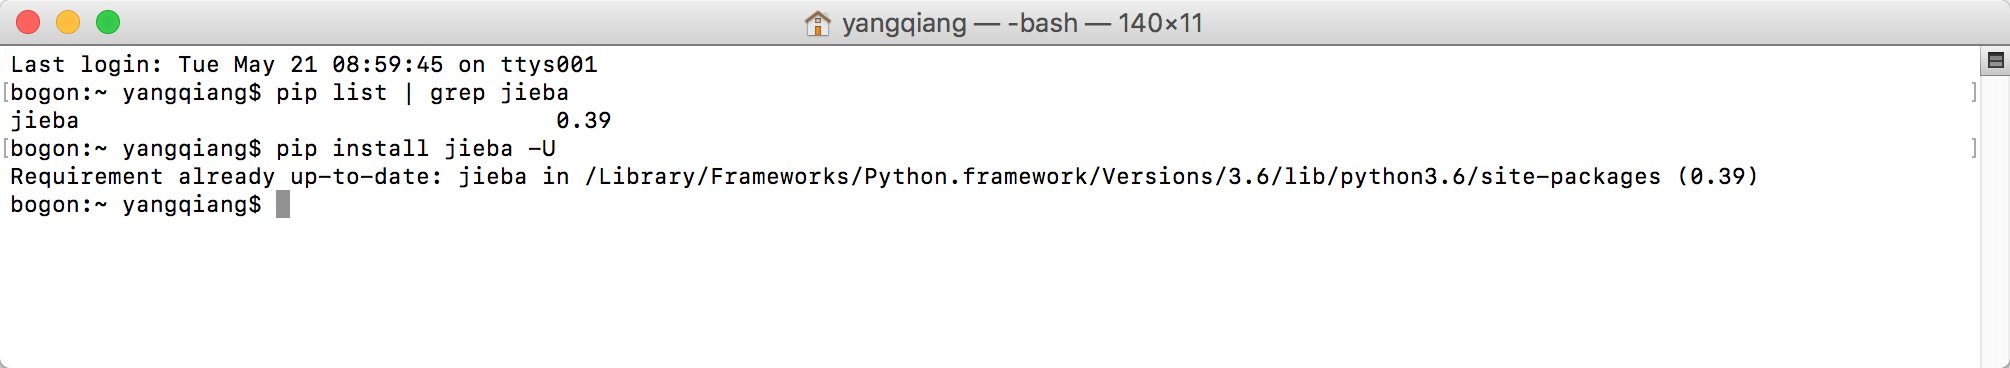

- 关于其他分词工具
    - 百度直接搜索关键字：python分词模块，常见的有：
        - jieba（百度：`https://github.com/fxsjy/jieba`）
        - THULAC（清华大学自然语言处理与社会人文计算实验室）
        - SnowNLP（MIT）
        - pynlpir（大数据搜索挖掘实验室（北京市海量语言信息处理与云计算应用工程技术研究中心））
        - CoreNLP
        - pyLTP
        - 盘古分词
        - Yaha分词
    

### jieba分词功能

In [133]:
import jieba
words = """
支持三种分词模式：
1.精确模式，试图将句子最精确地切开，适合文本分析；
2.全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
3.搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
乖乖隆地咚
"""
re_jieba = jieba.cut(words)
print(re_jieba)
print(list(re_jieba))

<generator object Tokenizer.cut at 0x11d448258>
['\n', '支持', '三种', '分', '词模式', '：', '\n', '1', '.', '精确', '模式', '，', '试图', '将', '句子', '最', '精确', '地', '切开', '，', '适合', '文本', '分析', '；', '\n', '2', '.', '全', '模式', '，', '把', '句子', '中', '所有', '的', '可以', '成词', '的', '词语', '都', '扫描', '出来', ',', ' ', '速度', '非常', '快', '，', '但是', '不能', '解决', '歧义', '；', '\n', '3', '.', '搜索引擎', '模式', '，', '在', '精确', '模式', '的', '基础', '上', '，', '对长', '词', '再次', '切分', '，', '提高', '召回', '率', '，', '适合', '用于', '搜索引擎', '分词', '。', '\n', '乖乖隆地咚', '\n']


### 添加自定义词典

-  字典格式：
    - 一个词占一行；
    - 每一行分三部分，每个部分使用一个空格分隔，按照下列顺序。
        - 词语
        - 词频（可省略）
        - 词性（可省略）

In [135]:
import jieba
words = """
支持三种分词模式：
1.精确模式，试图将句子最精确地切开，适合文本分析；
2.全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
3.搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
乖乖隆地咚
"""
jieba.load_userdict('jieba/dict.txt')
re_jieba = jieba.cut(words)
print(re_jieba)
print(list(re_jieba))
help(jieba.cut)

<generator object Tokenizer.cut at 0x11b952f10>
['\n', '支持', '三种', '分', '词模式', '：', '\n', '1', '.', '精确', '模式', '，', '试图', '将', '句子', '最', '精确', '地', '切开', '，', '适合', '文本', '分析', '；', '\n', '2', '.', '全', '模式', '，', '把', '句子', '中', '所有', '的', '可以', '成词', '的', '词语', '都', '扫描', '出来', ',', ' ', '速度', '非常', '快', '，', '但是', '不能', '解决', '歧义', '；', '\n', '3', '.', '搜索引擎', '模式', '，', '在', '精确', '模式', '的', '基础', '上', '，', '对长', '词', '再次', '切分', '，', '提高', '召回', '率', '，', '适合', '用于', '搜索引擎', '分词', '。', '\n', '乖乖隆地咚', '\n']
Help on method cut in module jieba:

cut(sentence, cut_all=False, HMM=True) method of jieba.Tokenizer instance
    The main function that segments an entire sentence that contains
    Chinese characters into seperated words.
    
    Parameter:
        - sentence: The str(unicode) to be segmented.
        - cut_all: Model type. True for full pattern, False for accurate pattern.
        - HMM: Whether to use the Hidden Markov Model.



### 分词中符号的处理

In [139]:
import jieba
import re
words = """
支持三种分词模式：
1.精确模式，试图将句子最精确地切开，适合文本分析；
2.全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
3.搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
乖乖隆地咚
"""
# 替换符号
words_no_punctuation = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", "", words) #去标点符号
# print(words_no_punctuation)
jieba.load_userdict('jieba/dict.txt')
re_jieba = jieba.cut(words_no_punctuation)
print(re_jieba)
print(list(re_jieba))
# help(jieba.cut)

<generator object Tokenizer.cut at 0x11d425048>
['支持', '三种', '分', '词模式', '：', '精确', '模式', '试图', '将', '句子', '最', '精确', '地', '切开', '适合', '文本', '分析', '全', '模式', '把', '句子', '中', '所有', '的', '可以', '成词', '的', '词语', '都', '扫描', '出来', '速度', '非常', '快', '但是', '不能', '解决', '歧义', '搜索引擎', '模式', '在', '精确', '模式', '的', '基础', '上', '对', '长词', '再次', '切分', '提高', '召回', '率', '适合', '用于', '搜索引擎', '分词', '乖乖隆地咚']


## 简历分类实现代码

In [98]:
#coding=utf-8
import jieba
import os
import pickle
from numpy import *
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  # TF-IDF向量转换类
from sklearn.feature_extraction.text import TfidfVectorizer  # TF_IDF向量生成类
from sklearn.datasets.base import Bunch
from sklearn.naive_bayes import MultinomialNB  # 多项式贝叶斯算法


def readFile(path):
    with open(path, 'r', errors='ignore') as file:  #忽略编码错误
        content = file.read()
        return content


def saveFile(path, result):
    with open(path, 'w', errors='ignore') as file:
        file.write(result)


def segText(inputPath, resultPath):
    fatherLists = os.listdir(inputPath)  # 主目录
    for eachDir in fatherLists:  # 遍历主目录中各个文件夹
        if eachDir.startswith('.'):
            continue
        eachPath = inputPath + eachDir + "/"  # 保存主目录中每个文件夹目录，便于遍历二级文件
        each_resultPath = resultPath + eachDir + "/"  # 分词结果文件存入的目录
        if not os.path.exists(each_resultPath):
            os.makedirs(each_resultPath)
        childLists = os.listdir(eachPath)  # 获取每个文件夹中的各个文件
        for eachFile in childLists:  # 遍历每个文件夹中的子文件
            eachPathFile = eachPath + eachFile  # 获得每个文件路径
            content = readFile(eachPathFile)  # 调用上面函数读取内容
            result = (str(content)).replace("\r\n", "").strip()  # 删除多余空行与空格
            cutResult = jieba.cut(result)  # 默认方式分词，分词结果用空格隔开
            saveFile(each_resultPath + eachFile, " ".join(cutResult))  # 调用上面函数保存文件


def bunchSave(inputFile, outputFile):
    catelist = os.listdir(inputFile)
    bunch = Bunch(target_name=[], label=[], filenames=[], contents=[])
    bunch.target_name.extend(catelist)  # 将类别保存到Bunch对象中
    for eachDir in catelist:
        if eachDir.startswith('.'):
            continue
        eachPath = inputFile + eachDir + "/"
        fileList = os.listdir(eachPath)
        for eachFile in fileList:  # 二级目录中的每个子文件
            fullName = eachPath + eachFile  # 二级目录子文件全路径
            bunch.label.append(eachDir)  # 当前分类标签
            bunch.filenames.append(fullName)  # 保存当前文件的路径
            bunch.contents.append(readFile(fullName).strip())  # 保存文件词向量
    with open(outputFile, 'wb') as file_obj:  # 持久化必须用二进制访问模式打开
        pickle.dump(bunch, file_obj)
        #pickle.dump(obj, file, [,protocol])函数的功能：将obj对象序列化存入已经打开的file中。
        #obj：想要序列化的obj对象。
        #file:文件名称。
        #protocol：序列化使用的协议。如果该项省略，则默认为0。如果为负值或HIGHEST_PROTOCOL，则使用最高的协议版本
def readBunch(path):
    with open(path, 'rb') as file:
        bunch = pickle.load(file)
        #pickle.load(file)
        #函数的功能：将file中的对象序列化读出。
    return bunch


def writeBunch(path, bunchFile):
    with open(path, 'wb') as file:
        pickle.dump(bunchFile, file)


def getStopWord(inputFile):
    stopWordList = readFile(inputFile).splitlines()
    return stopWordList


def getTFIDFMat(inputPath, stopWordList, outputPath):  # 求得TF-IDF向量
    bunch = readBunch(inputPath)
    tfidfspace = Bunch(target_name=bunch.target_name,label=bunch.label, filenames=bunch.filenames, tdm=[],
                       vocabulary={})
    # 初始化向量空间
    vectorizer = TfidfVectorizer(stop_words=stopWordList, sublinear_tf=True, max_df=0.5)
    # transformer = TfidfTransformer()  # 该类会统计每个词语的TF-IDF权值
    # 文本转化为词频矩阵，单独保存字典文件
    tfidfspace.tdm = vectorizer.fit_transform(bunch.contents)
    tfidfspace.vocabulary = vectorizer.vocabulary_   #获取词汇
    writeBunch(outputPath, tfidfspace)

def getTestSpace(testSetPath, trainSpacePath, stopWordList, testSpacePath):
    bunch = readBunch(testSetPath)
    # 构建测试集TF-IDF向量空间
    testSpace = Bunch(target_name=bunch.target_name, label=bunch.label, filenames=bunch.filenames, tdm=[],
                      vocabulary={})
    # 导入训练集的词袋
    trainbunch = readBunch(trainSpacePath)
    # 使用TfidfVectorizer初始化向量空间模型  使用训练集词袋向量
    vectorizer = TfidfVectorizer(stop_words=stopWordList, sublinear_tf=True, max_df=0.5,
                                 vocabulary=trainbunch.vocabulary)
    # transformer = TfidfTransformer()
    testSpace.tdm = vectorizer.fit_transform(bunch.contents)
    testSpace.vocabulary = trainbunch.vocabulary
    # 持久化
    writeBunch(testSpacePath, testSpace)

def bayesAlgorithm(trainPath, testPath):
    trainSet = readBunch(trainPath)
    testSet = readBunch(testPath)
    clf = MultinomialNB(alpha=0.001).fit(trainSet.tdm, trainSet.label)
    #alpha:0.001 alpha 越小，迭代次数越多，精度越高
    #print(shape(trainSet.tdm))  #输出单词矩阵的类型
    #print(shape(testSet.tdm))
    predicted = clf.predict(testSet.tdm)
    total = len(predicted)
    rate = 0
    for flabel, fileName, expct_cate in zip(testSet.label, testSet.filenames, predicted):
        if flabel != expct_cate:
            rate += 1
            print(fileName, ":实际类别：", flabel, "-->预测类别：", expct_cate)
    print("erroe rate:", float(rate) * 100 / float(total), "%")


# 分词，第一个是分词输入，第二个参数是结果保存的路径
segText("./dataset/data/", "./dataset/segResult/")   # 分词
bunchSave("./dataset/segResult/", "./dataset/train_set.dat")  # 输入分词，输出分词向量
stopWordList = getStopWord("./dataset/stop/stopword.txt")  # 获取停用词
getTFIDFMat("./dataset/train_set.dat", stopWordList, "./dataset/tfidfspace.dat")  # 输入词向量，输出特征空间

# 训练集
segText("./dataset/test1/", "./dataset/test_segResult/")  # 分词
bunchSave("./dataset/test_segResult/", "./dataset/test_set.dat")

getTestSpace("./dataset/test_set.dat", "./dataset/tfidfspace.dat", stopWordList, "./dataset/testspace.dat")
bayesAlgorithm("./dataset/tfidfspace.dat", "./dataset/testspace.dat")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


./dataset/test_segResult/10k-18k/3496172.txt :实际类别： 10k-18k -->预测类别： 10k-20k
./dataset/test_segResult/10k-18k/4543973.txt :实际类别： 10k-18k -->预测类别： 7k-9k
./dataset/test_segResult/10k-18k/4751316.txt :实际类别： 10k-18k -->预测类别： 15k-30k
./dataset/test_segResult/10k-20k/326941.txt :实际类别： 10k-20k -->预测类别： 10k-16k
./dataset/test_segResult/10k-20k/3770831.txt :实际类别： 10k-20k -->预测类别： 15k-20k
./dataset/test_segResult/10k-20k/3867925.txt :实际类别： 10k-20k -->预测类别： 15k-25k
./dataset/test_segResult/10k-20k/4072821.txt :实际类别： 10k-20k -->预测类别： 20k-40k
./dataset/test_segResult/10k-20k/4498906.txt :实际类别： 10k-20k -->预测类别： 7k-14k
./dataset/test_segResult/10k-20k/4580091.txt :实际类别： 10k-20k -->预测类别： 15k-25k
./dataset/test_segResult/10k-20k/4715977.txt :实际类别： 10k-20k -->预测类别： 20k-40k
./dataset/test_segResult/10k-20k/4772554.txt :实际类别： 10k-20k -->预测类别： 20k-40k
./dataset/test_segResult/10k-20k/4838990.txt :实际类别： 10k-20k -->预测类别： 25k-50k
./dataset/test_segResult/10k-20k/4875752.txt :实际类别： 10k-20k -->预测类别： 15k-30k
./d